In [114]:

# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report



In [115]:

# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"


In [116]:

df = pd.read_csv(r'd:\\talent_battle\\training.1600000.processed.noemoticon.csv'
, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)


In [117]:
df.sample(5)


,target,ids,date,flag,user,text
1283375,4,2001935255,Tue Jun 02 02:35:01 PDT 2009,NO_QUERY,keesitt,@munz its better u load finish b4 u watch u w...
738404,0,2265466410,Sun Jun 21 06:38:43 PDT 2009,NO_QUERY,INnoSynCE,Good morning ya'll! Happy Father's Day!! So ti...
1172263,4,1980604816,Sun May 31 07:11:54 PDT 2009,NO_QUERY,Rae4OSU,@natneagle check your email pleaseeee!!!
769617,0,2301510925,Tue Jun 23 15:32:18 PDT 2009,NO_QUERY,Zachamon,@ryanbarnholdt I'm not going to make it showe...
1553879,4,2184739872,Mon Jun 15 16:20:58 PDT 2009,NO_QUERY,danielchesnut,@joelpiper put in a good word to Kasey. Id lo...


In [118]:
df.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [119]:

df.columns


Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [120]:

print('length of data is', len(df))



length of data is 1600000


In [121]:

df. shape




(1600000, 6)

In [122]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [123]:

df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [124]:


data=df[['text','target']]


In [125]:

data['target'].unique()


array([0, 4], dtype=int64)

In [126]:


print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))


Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [127]:


np.sum(df.isnull().any(axis=1))


0

In [128]:



df['target'].nunique()

2

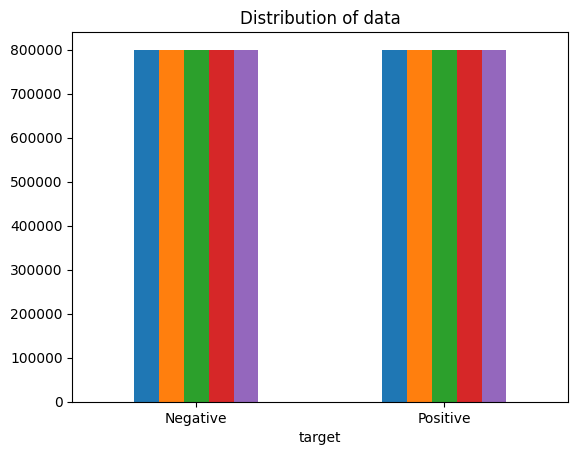

In [129]:

# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])


<Axes: xlabel='target', ylabel='count'>

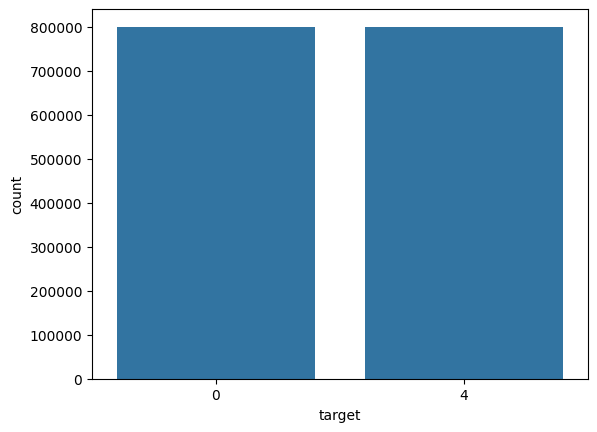

In [130]:

import seaborn as sns
sns.countplot(x='target', data=df)


In [131]:



data_pos = data[data['target'] == 4]
data_neg = data[data['target'] == 0]



In [132]:

data_pos = data_pos.iloc[:int(2000)]
data_neg = data_neg.iloc[:int(2000)]

In [133]:


dataset = pd.concat([data_pos, data_neg])

In [134]:

dataset['text']=dataset['text'].str.lower()

In [135]:

dataset['text'].tail()

1995                            @roxy_yeah yep a loser.  
1996    and finito! all bathroom contractors been thru...
1997    @caitlinaudrey awww!  that sucks! are you goin...
1998    sorry, sf. rescheduling my sf trip for this co...
1999    2morw  i get my blasted wisdom teeth pulled! n...
Name: text, dtype: object

In [136]:


stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']



In [137]:


STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].tail()


1995                                @roxy_yeah yep loser.
1996    finito! bathroom contractors thru house. quote...
1997        @caitlinaudrey awww! sucks! going sydney one?
1998    sorry, sf. rescheduling sf trip coming weekend...
1999    2morw get blasted wisdom teeth pulled! need sl...
Name: text, dtype: object

In [138]:

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()


1995                                   roxyyeah yep loser
1996    finito bathroom contractors thru house quotes ...
1997            caitlinaudrey awww sucks going sydney one
1998    sorry sf rescheduling sf trip coming weekend m...
1999    2morw get blasted wisdom teeth pulled need sle...
Name: text, dtype: object

In [139]:

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()


1995                                   roxyyeah yep loser
1996    finito bathroom contractors thru house quotes ...
1997            caitlinaudrey awww sucks going sydney one
1998    sorry sf rescheduling sf trip coming weekend m...
1999    2morw get blasted wisdom teeth pulled need sle...
Name: text, dtype: object

In [140]:

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()



1995                                   roxyyeah yep loser
1996    finito bathroom contractors thru house quotes ...
1997            caitlinaudrey awww sucks going sydney one
1998    sorry sf rescheduling sf trip coming weekend m...
1999    2morw get blasted wisdom teeth pulled need sle...
Name: text, dtype: object

In [141]:

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()


1995                                   roxyyeah yep loser
1996    finito bathroom contractors thru house quotes ...
1997            caitlinaudrey awww sucks going sydney one
1998    sorry sf rescheduling sf trip coming weekend m...
1999    morw get blasted wisdom teeth pulled need slee...
Name: text, dtype: object

In [142]:


from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()



800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [143]:


import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].tail()



1995           []
1996           []
1997        [www]
1998          [w]
1999    [w, w, w]
Name: text, dtype: object

In [144]:


lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()



800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [145]:
X=data.text[790000:810000]
y=data.target[790000:810000]

print(len(X),len(y))


20000 20000


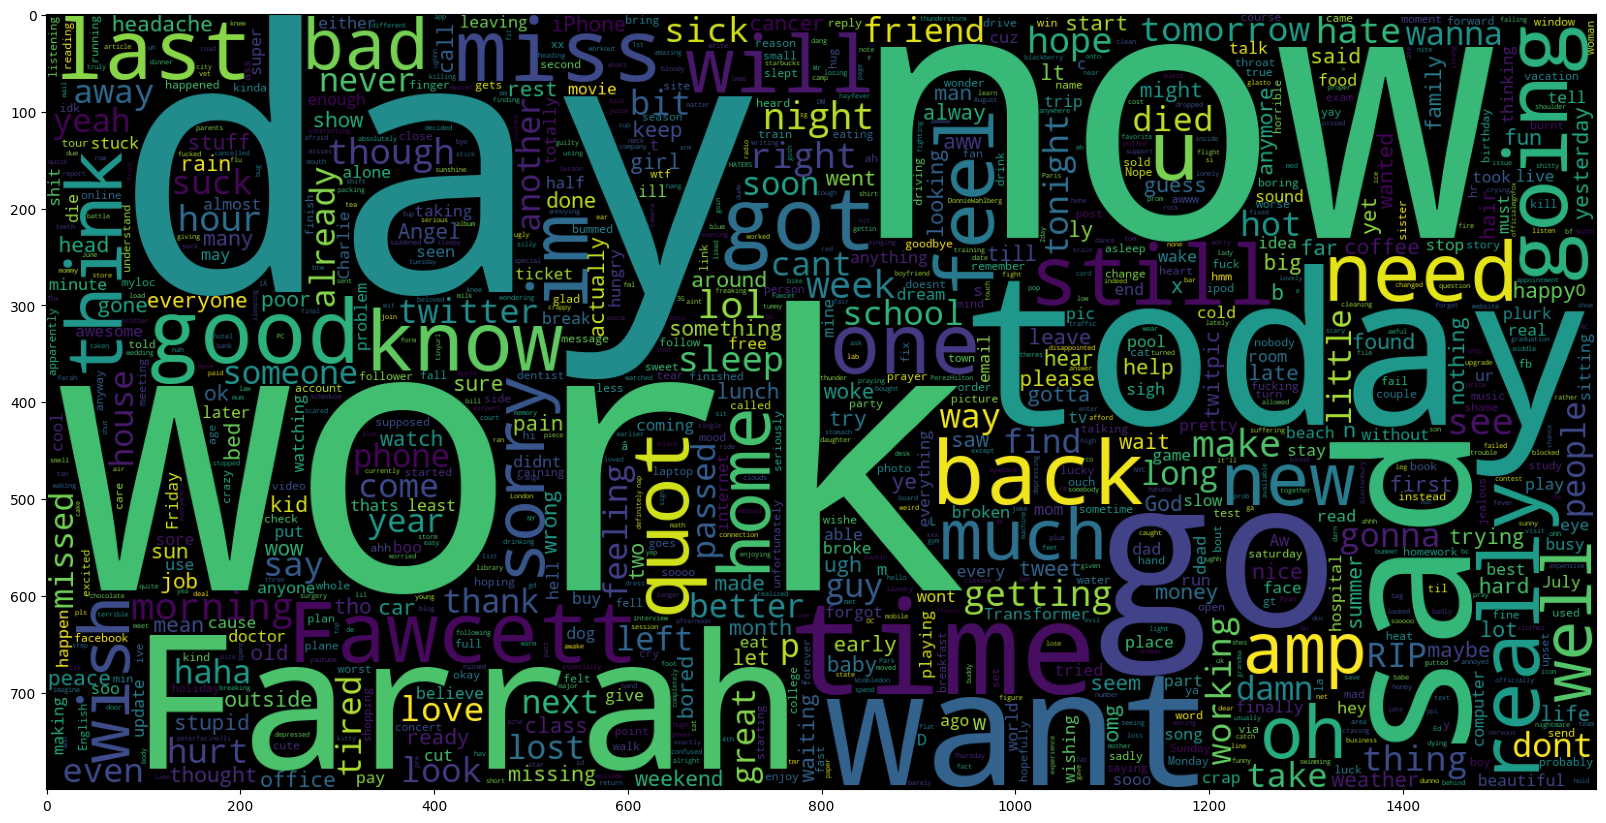

In [146]:

data_neg = data['text'][790000:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

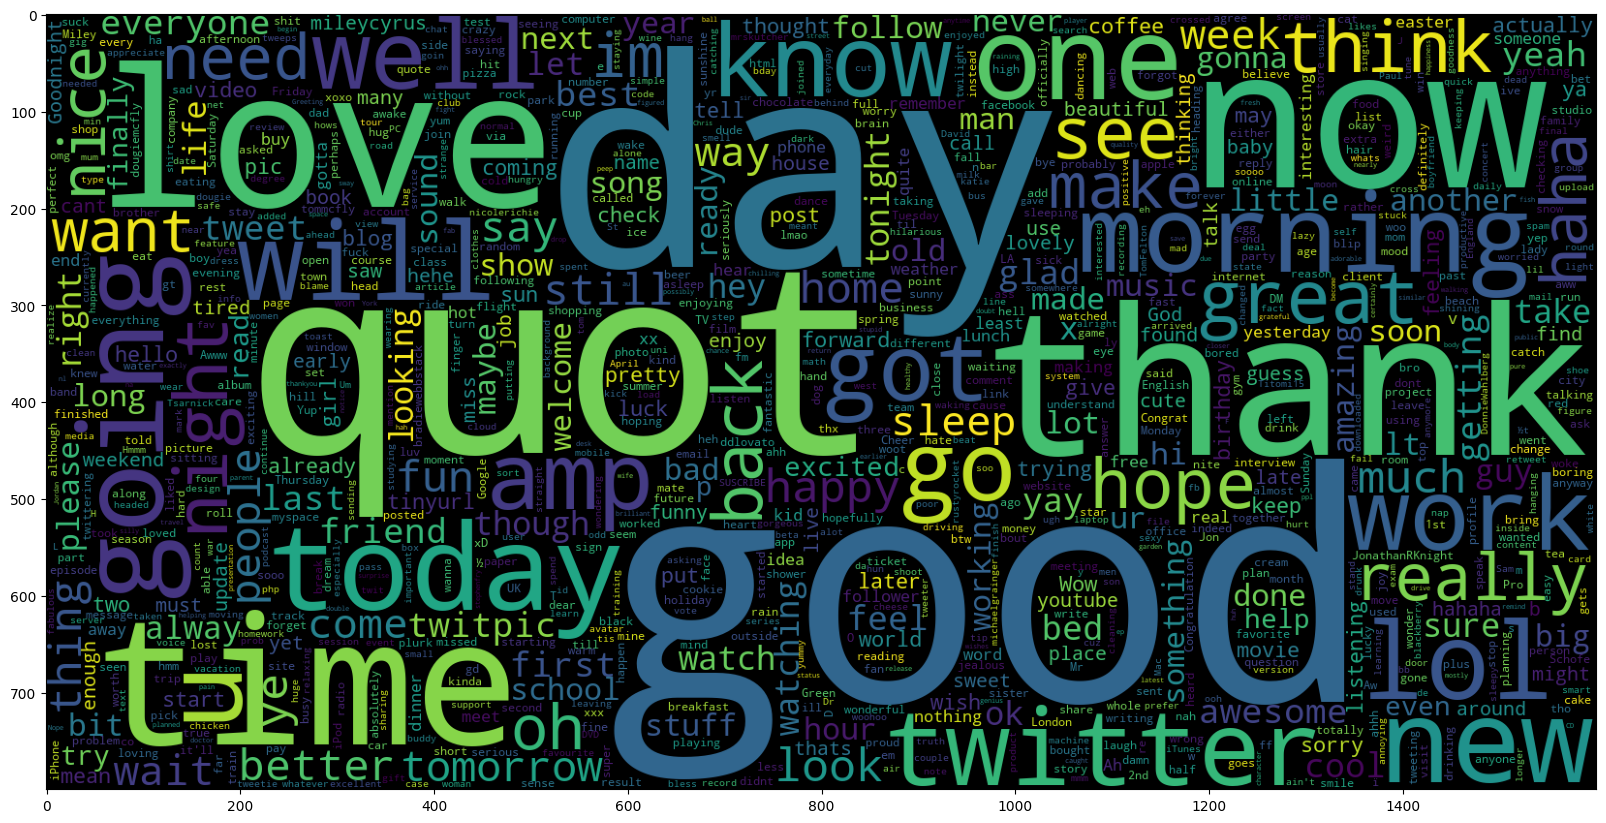

In [147]:


data_pos = data['text'][800000:810000]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)


In [148]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)



In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

# Assuming X_train_text and X_test_text contain the text data
# Splitting the data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26105111)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training text data
X_train = vectorizer.fit_transform(X_train_text)

# Transform the testing text data
X_test = vectorizer.transform(X_test_text)

# Create and fit the BernoulliNB model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

# Now you can use the trained model for prediction
y_pred = BNBmodel.predict(X_test)


In [150]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    
    # Reshape labels array to 2x2 array
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size':14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size':14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size':18}, pad=20)


In [151]:


BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)


BernoulliNB()

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       498
           4       0.80      0.77      0.78       502

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



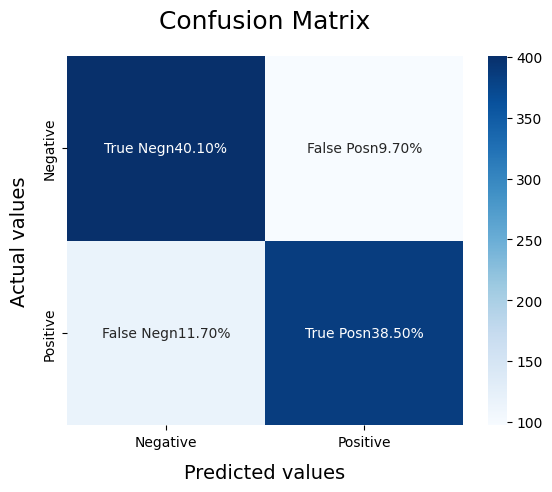

In [152]:

model_Evaluate(BNBmodel)
y_pred = BNBmodel.predict(X_test)

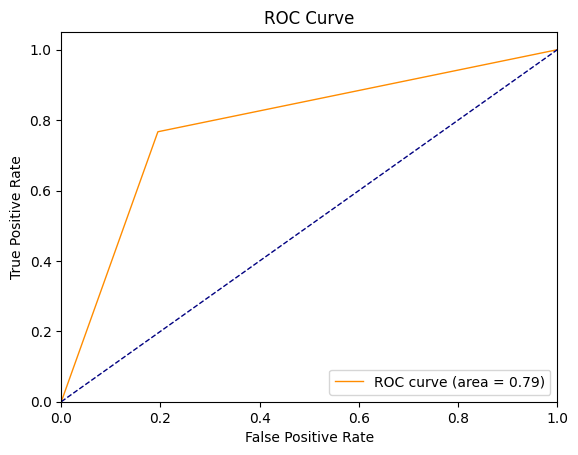

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map label 4 to 1 and keep label 0 as is
y_test_binary = np.where(y_test == 4, 1, y_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


SVC MODEL 

In [154]:


SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       498
           4       0.78      0.79      0.78       502

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



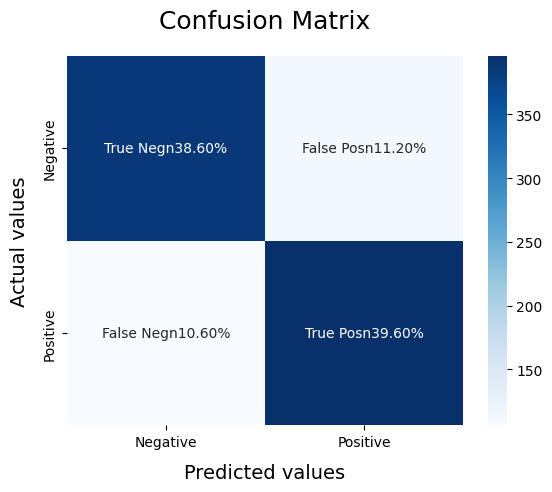

In [155]:

model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)


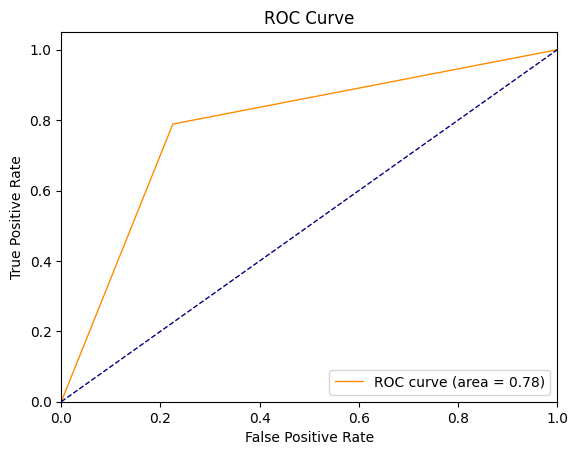

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map label 4 to 1 and keep label 0 as is
y_test_binary = np.where(y_test == 4, 1, y_test)

# Calculate ROC curve for y_pred2
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred2)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


LOGISTIC REGRESSION MODEL

In [157]:


LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)


LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       498
           4       0.78      0.80      0.79       502

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



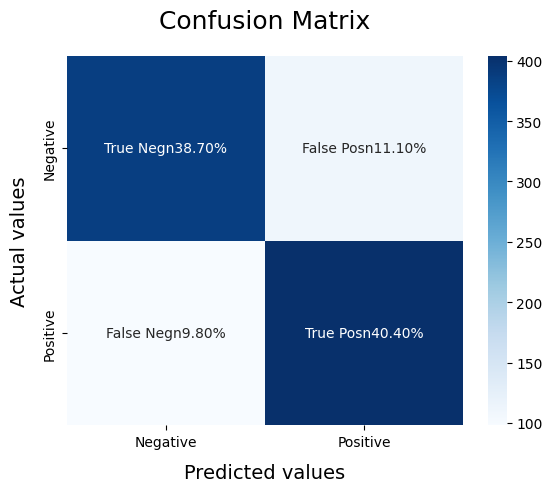

In [158]:

model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)


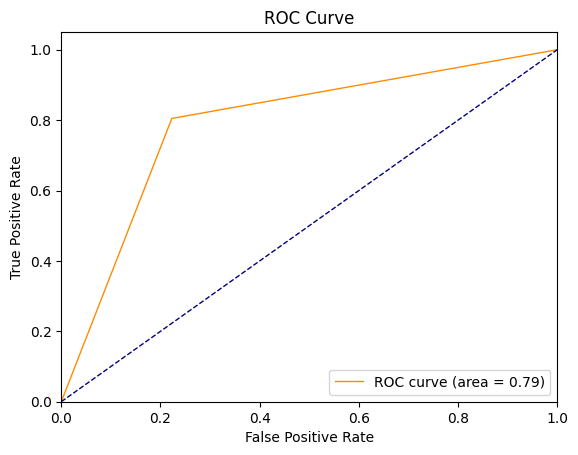

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Map label 4 to 1 and keep label 0 as is
y_test_binary = np.where(y_test == 4, 1, y_test)

# Calculate ROC curve for y_pred3
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred3)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
